In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import scipy.stats as st
import statsmodels as sm

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go


import re
import warnings
warnings.filterwarnings('ignore')

child = pd.read_csv("kiva_loans.csv")


In [2]:
child.disbursed_time = pd.to_datetime(child.disbursed_time)
child.posted_time = pd.to_datetime(child.posted_time)
child.funded_time = pd.to_datetime(child.funded_time)

child.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39,2013-12-17 08:00:00,2014-01-02 10:06:32,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08,2013-12-17 08:00:00,2014-01-02 09:17:23,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07,2013-12-17 08:00:00,2014-01-01 16:01:36,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11,2013-12-24 08:00:00,2014-01-01 13:00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19,2013-12-17 08:00:00,2014-01-01 19:18:51,14.0,16,NaN,female,monthly,2014-01-01


# Probability Distributions

In [3]:
b = child['use'].apply(lambda x: len(re.findall(r"([\s.,:;]son[\s.,:;s])|([\s.,:;]son\s*[.'’]+)", str(x)))) 
g = child['use'].apply(lambda x: len(re.findall(r"([\s.,:;]daughter[\s.,:;s])|([\s.,:;]daughter\s*[.'’]+)", str(x)))) 

b = b[b.values>0]
g = g[g.values>0]

b = child.iloc[b.index,:]
g = child.iloc[g.index,:]

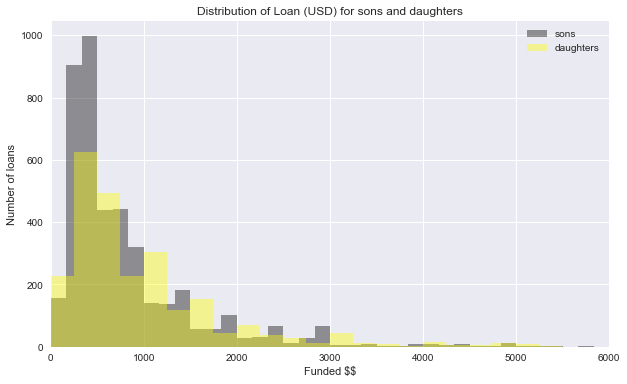

In [4]:
plt.figure(figsize=(10,6))
sns.distplot(b.funded_amount.values, bins=40, kde=False, color='black')
sns.distplot(g.funded_amount.values, bins=40, kde=False, color='yellow')
plt.title("Distribution of Loan (USD) for sons and daughters")
plt.legend(('sons','daughters'))
plt.ylabel("Number of loans")
plt.xlabel("Funded \$$")
plt.xlim((0,6000))
plt.show()

This histogram demonstrates:
* Sons get more loans funded than daughters across various dollar amounts
* Loans are concentrated at approximately \$500, \$1000, \$2000, \$2500, \$3000

**PMF**
* The Probability Mass Function gives you the probability that a discrete random variable is equal to some real value. It outlines the proportion of observations of given values. 


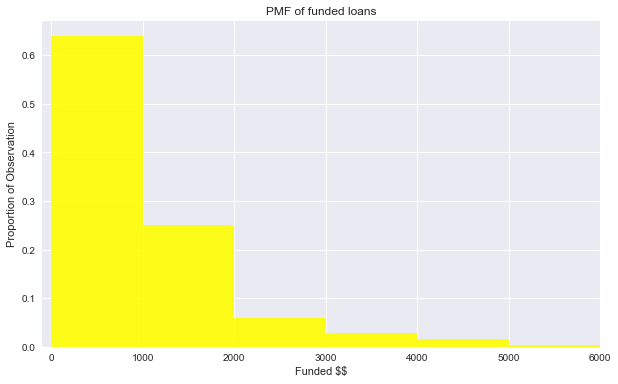

In [5]:
plt.figure(figsize=(10,6))
weights = np.ones_like(g.funded_amount.values)/len(g.funded_amount.values)
plt.hist(g.funded_amount.values, bins=10, weights=weights, color="yellow", alpha=0.9, normed=False) 
plt.ylabel("Proportion of Observation")
plt.xlabel('Funded \$$')
plt.title("PMF of funded loans")
plt.xlim((-100,6000))
plt.show()

25% of funded loans for daughters fall inbetween \$1000 to \$2000. But the bigest portion is under \$1000

**PDF**
* Probability Density Function (Kernel density) should be used with continuous data to check probability density at a given value.

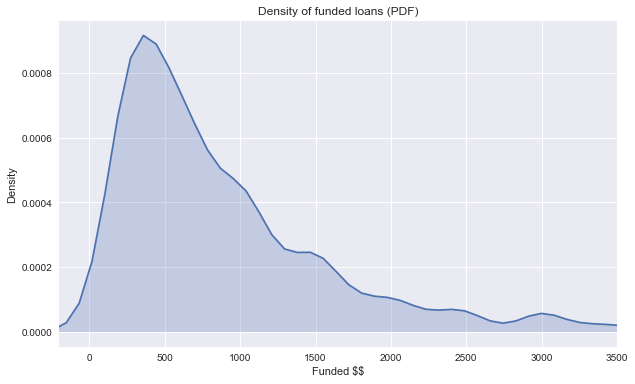

In [6]:
plt.figure(figsize=(10,6))
sns.kdeplot(g.funded_amount.values, shade=True)
plt.xlim((-200,3500))
plt.title("Density of funded loans (PDF)")
plt.ylabel("Density")
plt.xlabel('Funded \$$')
plt.show()

The data has the highest density around \$300-\$500 of funded loans. Density is also a reflection of probability. To see this better, let's look at posted time of loans

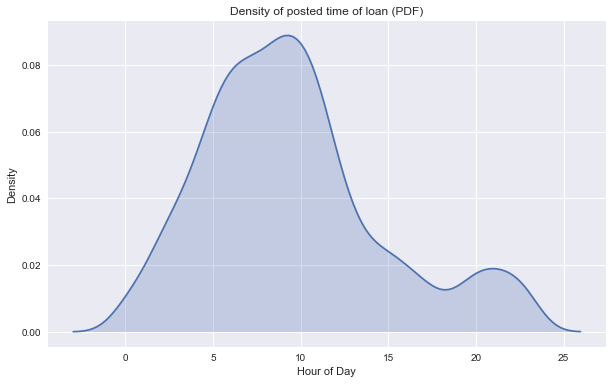

In [7]:
loan_posted = g.posted_time.apply(lambda x: x.hour)
plt.figure(figsize=(10,6))
sns.kdeplot(loan_posted.values, shade=True)
plt.title("Density of posted time of loan (PDF)")
plt.ylabel("Density")
plt.xlabel('Hour of Day')
plt.show()

In this case, the PDF is more revealing because we are measuring probability of posted_time of loan.
* Here we see that, between 8:00am-9:00am, is the highest probability for a loan to be posted.

**CDF**
* The cumulative distribution function tells us the probability that an observation drawn from a distribution would fall below a certian value

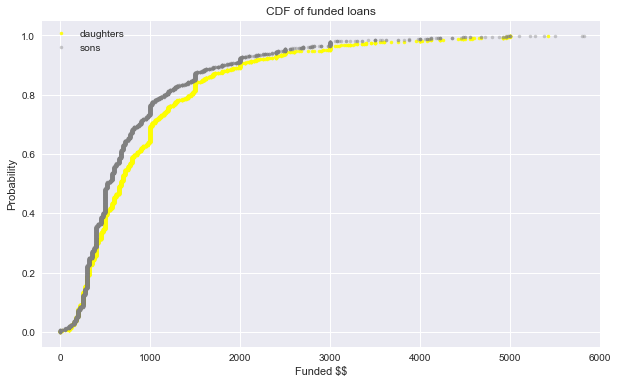

In [8]:
"""Compute ECDF for a one-dimensional array of measurements."""
def ecdf(data, datab):
    
    # Number of data points: n
    n = len(data)
    nb= len(datab)

    # x-data for the ECDF: x
    x = np.sort(data)
    xb= np.sort(datab)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    yb= np.arange(1, nb+1) / nb

    return x, y, xb, yb

"""Plot the ECDF"""
x, y, xb, yb = ecdf(g.funded_amount.values, b.funded_amount.values)

plt.figure(figsize=(10,6))
plt.plot(x,y, linestyle='none', marker='.', color='yellow', alpha=0.9)
plt.plot(xb,yb, linestyle='none', marker='.', color='gray', alpha=0.4)

plt.xlabel("Funded \$$")
plt.ylabel("Probability")
plt.title("CDF of funded loans")
plt.legend(('daughters','sons'))
plt.xlim((-200,6000))
plt.show()

This CDF illustrates:
* The probability that a funded loan for daughters would fall under \$1600 is 80% 
* 50% of loans for daughters fall under \$700
* From the 30th to the 90th percentile, funded loans for sons are of a smaller value that those funded for daughters

CDF in Seaborn

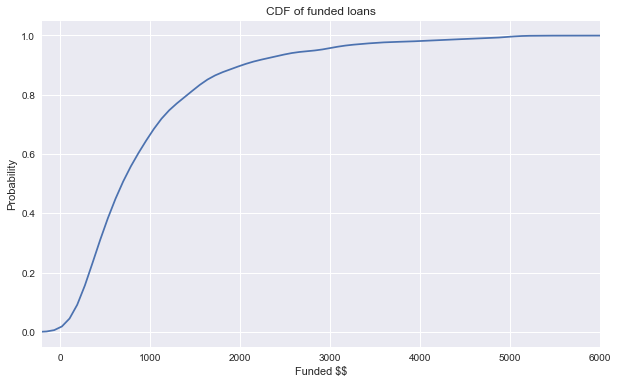

In [9]:
plt.figure(figsize=(10,6))
sns.kdeplot(g.funded_amount.values, shade=False, cumulative=True)
plt.xlim((-200,6000))
plt.xlabel("Funded \$$")
plt.ylabel("Probability")
plt.title("CDF of funded loans")
plt.show()

# Fitting a Distribution

**Plot best fitting distribution for continuous data, based on SSE**
* The residual sum of squares (RSS), also known as the sum of squared errors of prediction (SSE), is the sum of the squares of residuals (deviations predicted from actual empirical values of data).It is a measure of the discrepancy between the data and an estimation model. A small SSE indicates a tight fit of the model to the data. It is used as an optimality criterion in parameter selection and model selection.

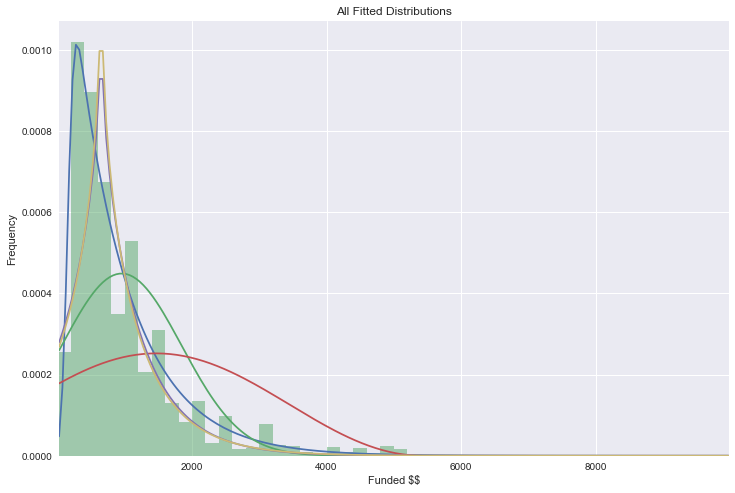

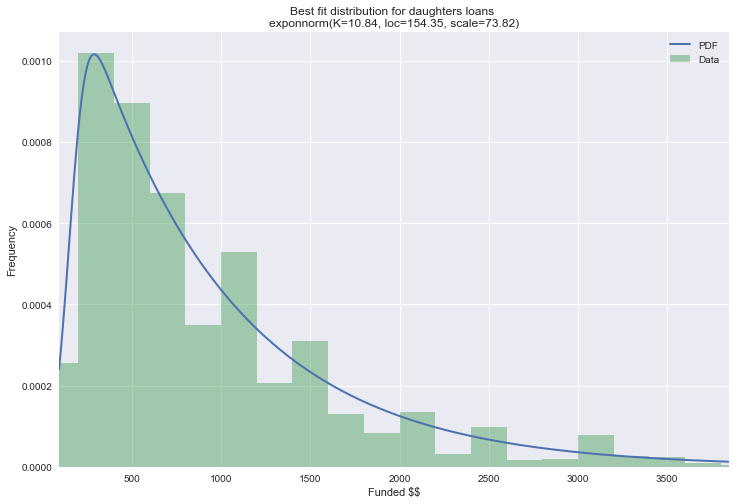

In [10]:
# Big thanks to @tmthydvnprt from Stackoverflow for the code


# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.exponnorm,st.norm,st.cosine,st.dgamma,st.dweibull
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Propbability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

# Load data 
data = pd.Series(g.funded_amount.values)

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5, color=plt.rcParams['axes.color_cycle'][1])
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fir_paramms = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'All Fitted Distributions')
ax.set_xlabel(u'Funded \$$')
ax.set_ylabel('Frequency')

# Make PDF
pdf = make_pdf(best_dist, best_fir_paramms)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fir_paramms)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Best fit distribution for daughters loans \n' + dist_str)
ax.set_xlabel(u'Funded \$$')
ax.set_ylabel('Frequency')
plt.show()

After checking 5 distributions, in theory, the best fitted distribution to the empirical (our data's) distribution is the Exponentially Modified Normal distribution. Scaled to our data, it's shape=10.84, mean=154, and standard diviation=73

In [21]:
#Mean(‘m’), variance(‘v’), skew(‘s’), and/or kurtosis(‘k’)
print(st.exponnorm.stats(K=10.84, loc=154.35, scale=73.82, moments='mvsk'))
print("\nWe see that the mean of the fitted distribution ~ the mean of the empirical data:\n")
print('empirical mean:',g.funded_amount.values.mean())

(array(954.5587999999999), array(645783.5159974399), array(1.9747382211810436), array(5.8991662041180035))

We see that the mean of the fitted distribution ~ the mean of the empirical data:

empirical mean: 954.796747967


In [22]:
st.exponnorm.stats(K=10.84, loc=154.35, scale=73.82, moments='mean')

array(954.5587999999999)

**To verify that the theoretical distribution above is a good fit to our current data, we can plot a CDF**

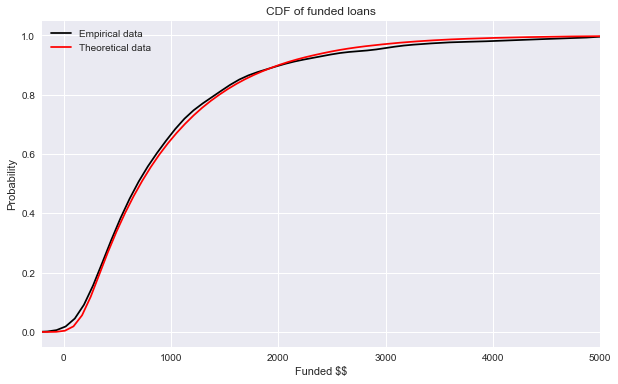

In [23]:
# Generate 100,000 random samples of data within the Exponentially Modified Normal distribution, using the paramateres
# that represent the best fit.
theoretical_data_points = st.exponnorm.rvs(10.84, loc=154.35, scale=73.82, size=100000)

plt.figure(figsize=(10,6))
sns.kdeplot(g.funded_amount.values, shade=False, cumulative=True, color='black', label='Empirical data')
sns.kdeplot(theoretical_data_points, shade=False, cumulative=True, color='red', label='Theoretical data')
plt.xlim((-200,5000))
plt.xlabel("Funded \$$")
plt.ylabel("Probability")
plt.title("CDF of funded loans")
plt.legend()
plt.show()

The scaled Exponentially Modified Normal distribution looks like a good fit. However, from 0-10th percentile there is a discrepancy between the data and the model. Funded loans are of a smaller value than what we would expect in an Exponentially Modified Normal distribution. 
* If we were specifically interested in loans between \$1 - \$200, it would be important to get this part of the distribution right

In [24]:
print("When fitting the data to the best distribution, we get the distribution's shape, loc, scale")
st.exponnorm.fit(g.funded_amount.values)

When fitting the data to the best distribution, we get the distribution's shape, loc, scale


(10.843083469714568, 154.34801267912121, 73.821139098504489)

# Deeper Analysis of Probability Distributions

**Probability Density Function (PDF)**

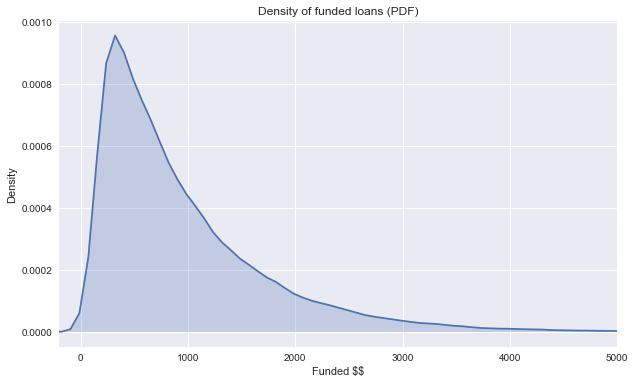

In [25]:
theoretical_data_points = st.exponnorm.rvs(10.84, loc=154.35, scale=73.82, size=100000)


plt.figure(figsize=(10,6))
sns.kdeplot(theoretical_data_points, shade=True)
plt.xlim((-200,5000))
plt.title("Density of funded loans (PDF)")
plt.ylabel("Density")
plt.xlabel('Funded \$$')
plt.show()

**PDF using Scipy**

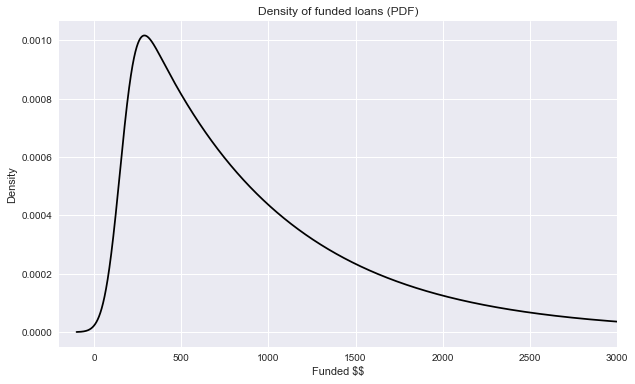

In [26]:
theory_std = st.exponnorm.std(K=10.84, loc=154.35, scale=73.82)
theory_mean = st.exponnorm.mean(K=10.84, loc=154.35, scale=73.82)

x = sp.linspace(-100,5*theory_std, 100000) # 100,000 numbers between -100 to 5 std to the right of mean. 
pdf = st.exponnorm.pdf(x, 10.84, loc=154.35, scale=73.82)
plt.figure(figsize=(10,6))
plt.plot(x,pdf, color="black")
plt.title("Density of funded loans (PDF)")
plt.xlabel("Funded \$$")
plt.ylabel("Density")
plt.xlim((-200,3000))
plt.draw()

We see that the highest density of funded loans is around the \$300-\$400 mark

**CDF using Scipy**

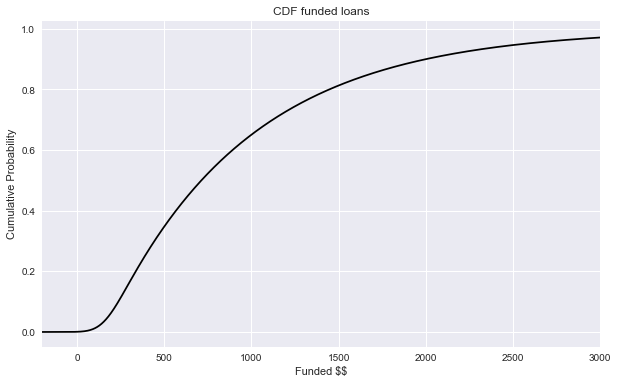

In [27]:
x = sp.linspace(-4*theory_std,4*theory_std, 100000)
cdf = st.exponnorm.cdf(x, K=10.84, loc=154.35, scale=73.82)
plt.figure(figsize=(10,6))
plt.plot(x,cdf, color="black")
plt.title("CDF funded loans")
plt.xlabel("Funded \$$")
plt.ylabel("Cumulative Probability")
plt.xlim((-200,3000))
plt.draw()

Apparently, there is a 65% probability that a funded loan would be under the \$1000 mark

**PPF (Percent Point Function)**
* Percent Point Function is the inverse of a CDF

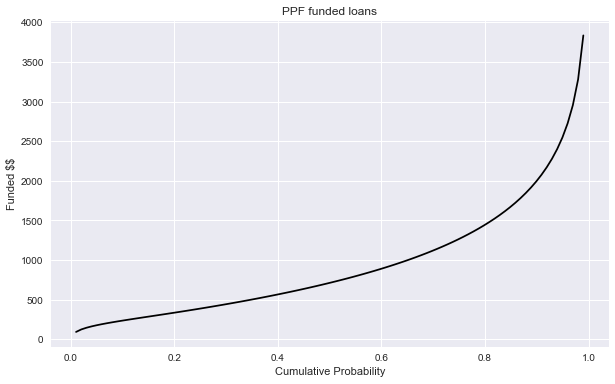

For analysis of one percentile point, all we have to do is imput the percentile we care about in the code below.

For example, there is a 51% probability that a random data point (funded loan) will fall under: $728.583839308376


In [28]:
q = sp.linspace(0, 1.0, 100) # generate 100 numbers b/w 0.0-0.1
y = st.exponnorm.ppf(q, K=10.84, loc=154.35, scale=73.82)
plt.figure(figsize=(10,6))
plt.plot(q,y, color="black")
plt.title("PPF funded loans")
plt.xlabel("Cumulative Probability")
plt.ylabel("Funded \$$")
plt.show()

print("For analysis of one percentile point, all we have to do is imput the percentile we care about in the code below.")
print("\nFor example, there is a 51% probability that a random data point (funded loan) will fall under: ${}".format(
st.exponnorm.ppf(0.51, K=10.84, loc=154.35, scale=73.82)))

**SF (survival function)**
* Survival function gives the probability that the variate has a value greater than the given value; SF = 1 - CDF.

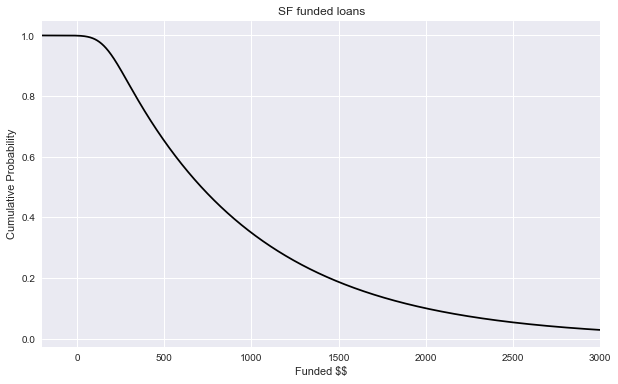

The probability that a data point (funded loans) will fall above $728.58 is: 0.49


In [29]:
x = sp.linspace(-3*theory_std,4*theory_std, 100000)
sf = st.exponnorm.sf(x, K=10.84, loc=154.35, scale=73.82)
plt.figure(figsize=(10,6))
plt.plot(x,sf, color="black")
plt.title("SF funded loans")
plt.xlabel("Funded \$$")
plt.ylabel("Cumulative Probability")
plt.xlim((-200,3000))
plt.show()
print("The probability that a data point (funded loans) will fall above $728.58 is: {}".format(
round((st.exponnorm.sf(728.58, K=10.84, loc=154.35, scale=73.82)), 3)))

**ISF (inverse survival function)**
* Inverse Survival function is the inverse of a ISF

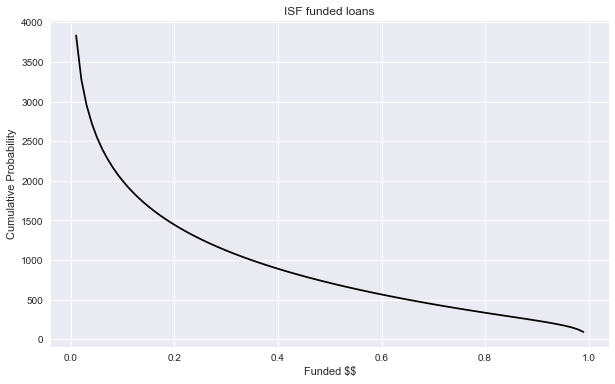

Here too, we can imput the percentile into code below.

For example, there is a 49% probability that a random data point (funded loan) will fall above: $728.583839308376


In [30]:
q = sp.linspace(0, 1.0, 100)
isf = st.exponnorm.isf(q, K=10.84, loc=154.35, scale=73.82)
plt.figure(figsize=(10,6))
plt.plot(q,isf, color="black")
plt.title("ISF funded loans")
plt.xlabel("Funded \$$")
plt.ylabel("Cumulative Probability")
plt.show()
print("Here too, we can imput the percentile into code below.")
print("\nFor example, there is a 49% probability that a random data point (funded loan) will fall above: ${}".format(
st.exponnorm.isf(0.49, K=10.84, loc=154.35, scale=73.82)))

Annex A: list of all continuous distributions on scipy.stats 

In [31]:
Distributions = [st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy]